<h1 style="color:blue">Simulation Project Part 6</h1>
<h1>Mohammad Saeed Zare Mehrjardi - 99243037</h1>
<h1>Zahra Sadat Esmati Baygi - 99243053 </h1>

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import math
import random
from scipy.stats import norm
import scipy
import sys
import graph as gr
import seaborn as sns
import pandas as pd

# Draw PDF Plot

In [2]:
def draw_plot(x, y, xlabel="", ylable="", title=""):
    # Calculate additional statistics
    mean = np.mean(y)
    std = np.std(y)

    # CI
    lower_ci = y - np.mean(y) / np.sqrt(len(y))
    upper_ci = y + np.mean(y) / np.sqrt(len(y))

    # Create the figure and axes
    fig, ax = plt.subplots()

    # Plot the curve and fill between the CI
    ax.plot(x, y, color='b', label=title)
    ax.fill_between(x, lower_ci, upper_ci, color='lightblue', alpha=0.7 , label='CI')

    # Set the title and labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylable)

    # Customize the ticks and grid
    ax.xaxis.set_tick_params(which='both', direction='in', bottom=True, top=True)
    ax.yaxis.set_tick_params(which='both', direction='in', left=True, right=True)
    ax.grid(True, linestyle='--', alpha=0.5)

    # Add a legend
    ax.legend(loc='upper right')

    # Add statistics annotations
    ax.text(0.1, 0.9, f"Mean: {mean:.2f}", transform=ax.transAxes)
    ax.text(0.1, 0.85, f"Standard Deviation: {std:.2f}", transform=ax.transAxes)

    # Customize the figure background
    fig.patch.set_facecolor('lightgray')

    # Show the plot
    plt.show()

# Sample k-Regular Graph

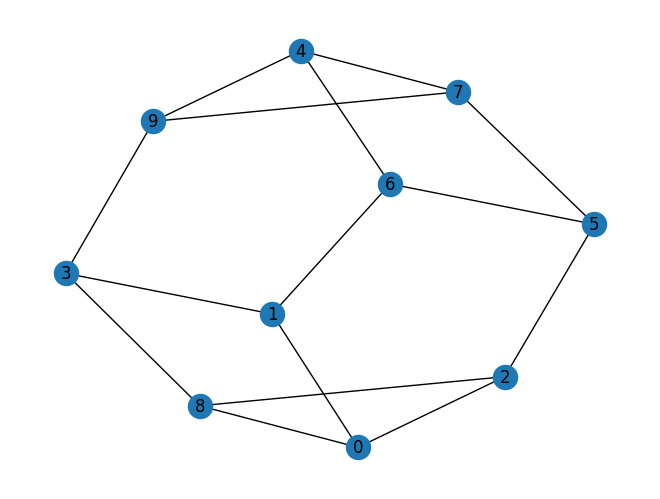

In [3]:
n = 10
d = 3
seed = 60

rg = nx.random_regular_graph(d, n, seed)

nx.draw(rg, with_labels=True)
plt.show()

# Compate two sets of Graph (RSRBG vs K-Regular)
## N = 496 , average degree = 6

# Create 1000 k-regular graph dataset 

In [14]:
# create dataset of 6-regular graph with size 500 (1000 graphs)
number_of_simulation = 2
n = 496
d = 6
seed = 60

reg_graphs = []
rg_degrees = []
rg_eigens = []
for _ in range(number_of_simulation):
    rg = nx.random_regular_graph(d, n, seed)
    
    rg_degrees += [d for n, d in rg.degree()]
    rg_eigens += gr.complex_abs(gr.adjacency_eigen_values(rg))
    
    reg_graphs.append(rg)

### Degree Distribution

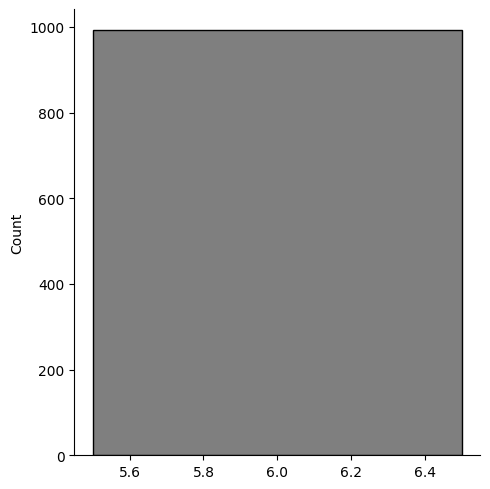

In [15]:
sns.displot(rg_degrees, kde=True, color="black")

### Eigen Values Distribution

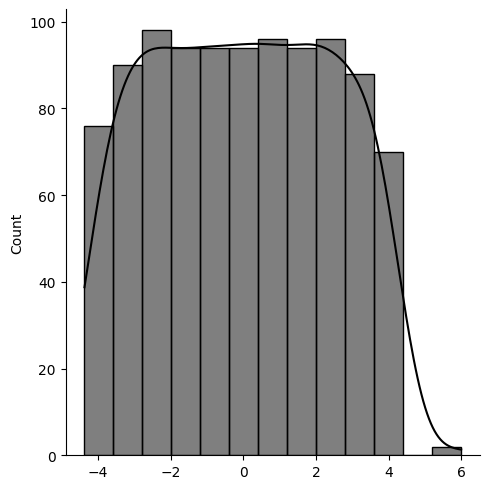

In [16]:
sns.displot(rg_eigens, kde=True, color="black")

### Calculate Probability of inconsistency

In [17]:
table = []

# cut from 1 to 50 %
for cut in range(1, 40):
    disconnected = 0
    
    for reg in reg_graphs:
        reg_copy = reg.copy()
        n = len(list(reg_copy.edges()))
        number_of_cuts = (cut * n) / 100
        
        nc = 0
        ec = 0
        ac = 0
        
        for _ in range(int(number_of_cuts)):
            if len(list(reg_copy.edges())) > 0:
                selected = random.choice(list(reg_copy.edges()))
                reg_copy.remove_edge(selected[0], selected[1])
                
        
        nc += nx.node_connectivity(reg_copy)
        ec += nx.edge_connectivity(reg_copy)
        ac += gr.algebraic_connectivity(reg_copy)
        
        connected = True
        if not nx.is_connected(reg_copy):
            connected = False 
            disconnected += 1
        
        
            
    print(disconnected)
    p = disconnected / len(reg_graphs)
    
    table.append([cut, number_of_cuts, disconnected, p, nc/len(reg_graphs), ec/len(reg_graphs), ac/len(reg_graphs)])
        
        

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
1
1
2
2
0
2
2
1


In [18]:
df = pd.DataFrame(table, columns=['cut(%)', 'number of cuts', 'number of disconnected', 'possibility of inconsistency',
                                 'node connectivity', 'edge connectivity', 'algebratic connectivity'])
df

,cut(%),number of cuts,number of disconnected,possibility of inconsistency,node connectivity,edge connectivity,algebratic connectivity
0,1,14.88,0,0.0,2.5,2.5,0.781567
1,2,29.76,0,0.0,2.0,2.0,0.752498
2,3,44.64,0,0.0,2.0,2.0,0.760096
3,4,59.52,0,0.0,1.5,1.5,0.704357
4,5,74.40,0,0.0,1.5,1.5,0.720947
5,6,89.28,0,0.0,1.5,1.5,0.654410
6,7,104.16,0,0.0,1.5,1.5,0.666053
7,8,119.04,0,0.0,1.5,1.5,0.640478
8,9,133.92,0,0.0,1.0,1.0,0.585680
9,10,148.80,0,0.0,1.5,1.5,0.630586


### 6-Regular Probability Of Inconsistancy

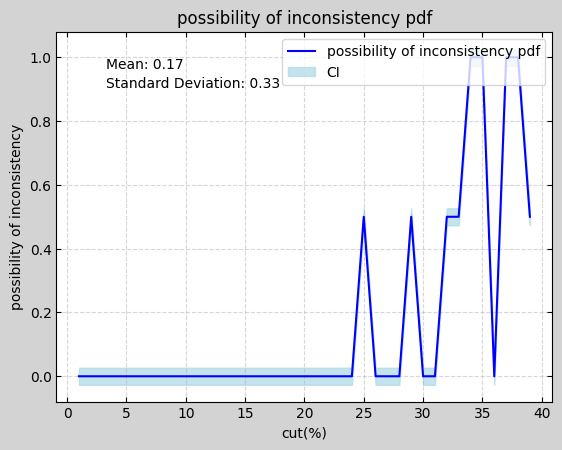

In [19]:
c = df['cut(%)']
p = df['possibility of inconsistency']

draw_plot(c, p, "cut(%)", "possibility of inconsistency", "possibility of inconsistency pdf")

### 6-Regular Node Connectivity

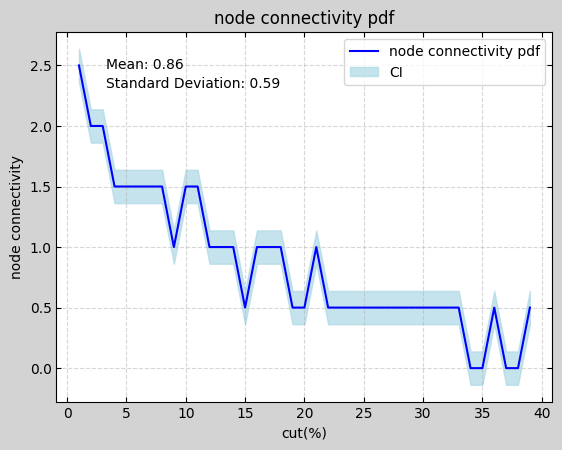

In [20]:
c = df['cut(%)']
p = df['node connectivity']

draw_plot(c, p, "cut(%)", "node connectivity", "node connectivity pdf")

### 6-Regular Edge Connectivity

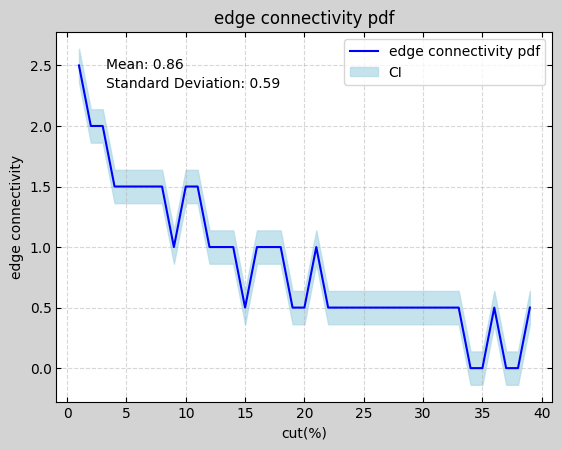

In [21]:
c = df['cut(%)']
p = df['edge connectivity']

draw_plot(c, p, "cut(%)", "edge connectivity", "edge connectivity pdf")

### 6-Regular algebratic Connectivity

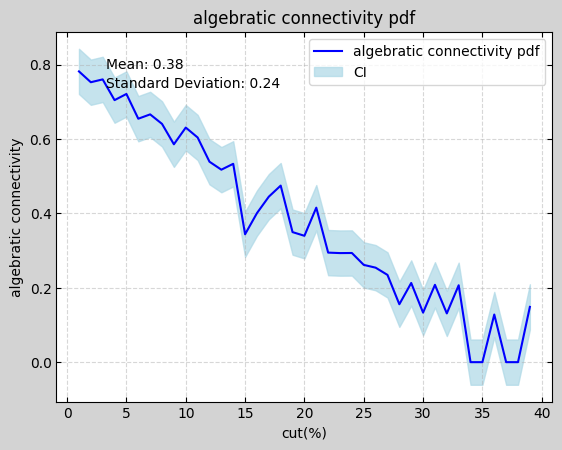

In [22]:
c = df['cut(%)']
p = df['algebratic connectivity']

draw_plot(c, p, "cut(%)", "algebratic connectivity", "algebratic connectivity pdf")

In [23]:
# Create 1000 RSRBG graph dataset

In [28]:
# create dataset of 6-regular graph with size 500 (1000 graphs)
number_of_simulation = 5
n = 496
d1 = 4
d2 = 12

rsrbg_graphs = []
rsrbg_degrees = []
rsrbg_eigens = []
for _ in range(number_of_simulation):
    rsrbg = gr.RSRBG(n, d1, d2)[0]
    
    rsrbg_degrees += [d for n, d in rsrbg.degree()]
    rsrbg_eigens += gr.complex_abs(gr.adjacency_eigen_values(rsrbg))
    
    rsrbg_graphs.append(rsrbg)

### RSRBG Degree Distribution

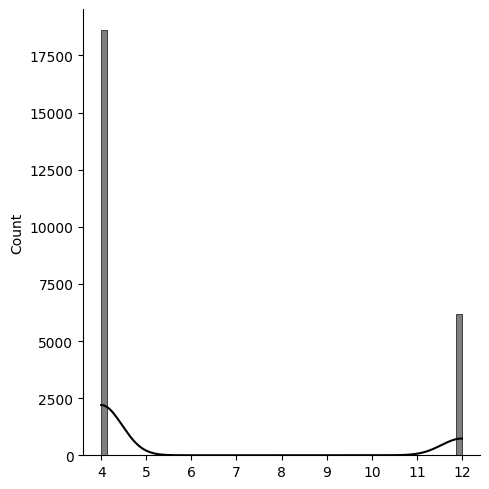

In [25]:
sns.displot(rsrbg_degrees, kde=True, color="black")

### RSRBG Eigen Values Distribution

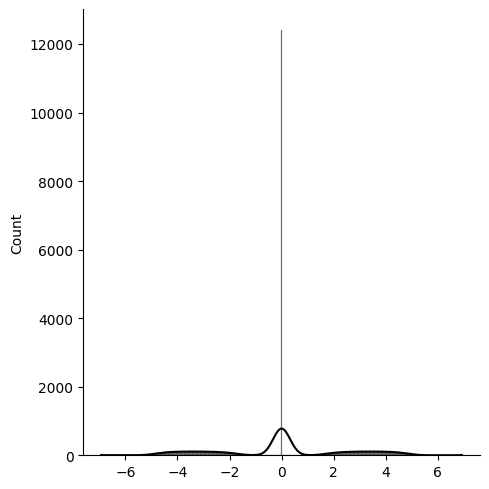

In [26]:
sns.displot(rsrbg_eigens, kde=True, color="black")

### Calculate Probability of inconsistency

In [29]:
rsrbg_table = []

# cut from 1 to 50 %
for cut in range(1, 40):
    disconnected = 0
    
    for reg in rsrbg_graphs:
        reg_copy = reg.copy()
        n = len(list(reg_copy.edges()))
        number_of_cuts = (cut * n) / 100
        
        nc = 0
        ec = 0
        ac = 0
        
        for _ in range(int(number_of_cuts)):
            if len(list(reg_copy.edges())) > 0:
                selected = random.choice(list(reg_copy.edges()))
                reg_copy.remove_edge(selected[0], selected[1])
        
        nc += nx.node_connectivity(reg_copy)
        ec += nx.edge_connectivity(reg_copy)
        ac += gr.algebraic_connectivity(reg_copy)
                
        
        connected = True
        if not nx.is_connected(reg_copy):
            connected = False 
            disconnected += 1
            
    print(disconnected)
    p = disconnected / len(reg_graphs) 
    rsrbg_table.append([cut, number_of_cuts, disconnected, p, nc/len(rsrbg_graphs), ec/len(rsrbg_graphs), ac/len(rsrbg_graphs)])

0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
3
4
1
3
1
4
4
5
5
4
4
5
5
5
5
5
5
5
5
5
5
5


In [30]:
rdf = pd.DataFrame(rsrbg_table, columns=['cut(%)', 'number of cuts', 'number of disconnected', 'possibility of inconsistency',
                                        'node connectivity', 'edge connectivity', 'algebratic connectivity'])
rdf

,cut(%),number of cuts,number of disconnected,possibility of inconsistency,node connectivity,edge connectivity,algebratic connectivity
0,1,14.88,0,0.0,0.4,0.4,0.304672
1,2,29.76,0,0.0,0.4,0.4,0.302165
2,3,44.64,0,0.0,0.4,0.4,0.294818
3,4,59.52,0,0.0,0.4,0.4,0.284969
4,5,74.40,0,0.0,0.4,0.4,0.273545
5,6,89.28,0,0.0,0.4,0.4,0.252588
6,7,104.16,0,0.0,0.2,0.2,0.169818
7,8,119.04,0,0.0,0.2,0.2,0.162702
8,9,133.92,0,0.0,0.2,0.2,0.156961
9,10,148.80,0,0.0,0.2,0.2,0.166350


### RSRBG Probability

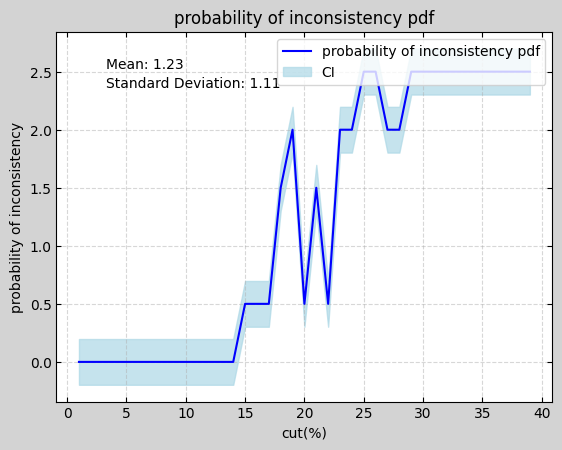

In [31]:
c = rdf['cut(%)']
p = rdf['possibility of inconsistency']

draw_plot(c, p, "cut(%)", "probability of inconsistency", "probability of inconsistency pdf")

### RSRBG Node Connectivity 

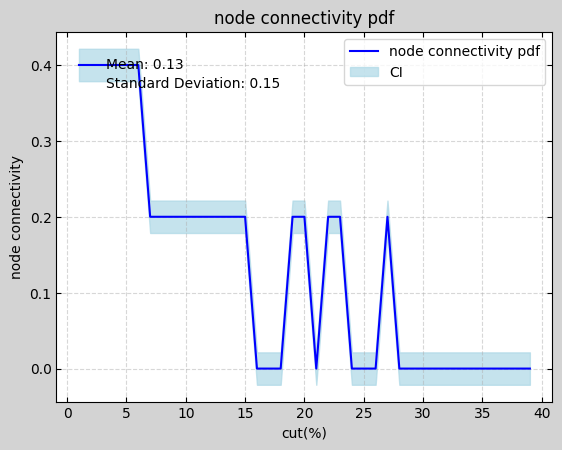

In [32]:
c = rdf['cut(%)']
p = rdf['node connectivity']

draw_plot(c, p, "cut(%)", "node connectivity", "node connectivity pdf")

### RSRBG Edge Connectivity 

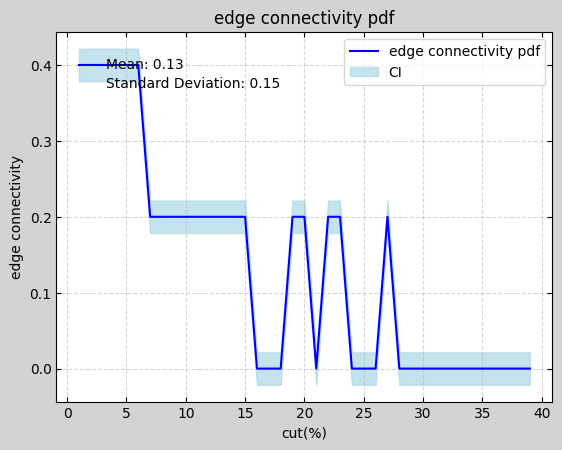

In [33]:
c = rdf['cut(%)']
p = rdf['edge connectivity']

draw_plot(c, p, "cut(%)", "edge connectivity", "edge connectivity pdf")

### RSRBG Algebratic Connectivity 

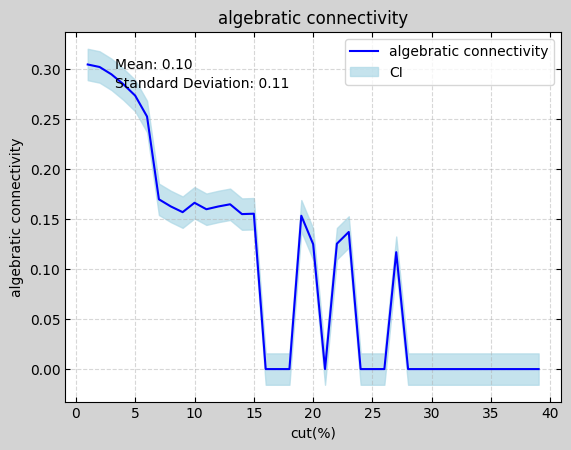

In [34]:
# Generate some data
x = rdf['cut(%)']
y = rdf['algebratic connectivity']

draw_plot(x, y, "cut(%)", "algebratic connectivity", "algebratic connectivity")


### RSRBG Algebratic Connectivity 

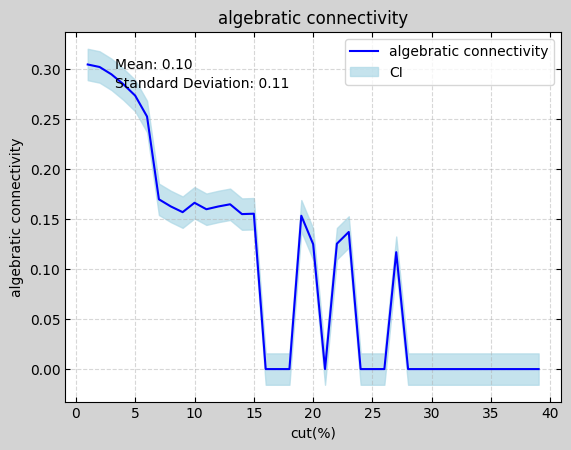

In [35]:
# Generate some data
x = rdf['cut(%)']
y = rdf['algebratic connectivity']

draw_plot(x, y, "cut(%)", "algebratic connectivity", "algebratic connectivity")
